# EU Pollutant Releases to Water (2010–2023)

This notebook explores the trend of pollutant releases to water in the EU27 using five visualizations based on indexed data (2010 = 100).

# 📘 Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("eea_s_indp005_p_2010-2023_v01_r00.csv")

# Simplify pollutant labels
df['dimension_label'] = df['dimension_label'].str.replace(
    "Industrial pollutant releases to water in Europe - ",
    "",
    regex=False
)

# Style
sns.set(style="whitegrid")
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

df.head()


,eu_sdg,dimension,dimension_label,unit,unit_label,geo,geo_label,time,obs_value,obs_status
0,indp005,INDP_W_HM,Industrial pollutant releases to water in Euro...,I10,"Index, 2010 = 100",EU27_2020,European Union - 27 countries (from 2020),2010,100.0,NaN
1,indp005,INDP_W_HM,Industrial pollutant releases to water in Euro...,I10,"Index, 2010 = 100",EU27_2020,European Union - 27 countries (from 2020),2011,93.8,NaN
2,indp005,INDP_W_HM,Industrial pollutant releases to water in Euro...,I10,"Index, 2010 = 100",EU27_2020,European Union - 27 countries (from 2020),2012,95.1,NaN
3,indp005,INDP_W_HM,Industrial pollutant releases to water in Euro...,I10,"Index, 2010 = 100",EU27_2020,European Union - 27 countries (from 2020),2013,95.2,NaN
4,indp005,INDP_W_HM,Industrial pollutant releases to water in Euro...,I10,"Index, 2010 = 100",EU27_2020,European Union - 27 countries (from 2020),2014,101.8,NaN


# 📈 1. Line Chart – Pollutant Trends Over Time

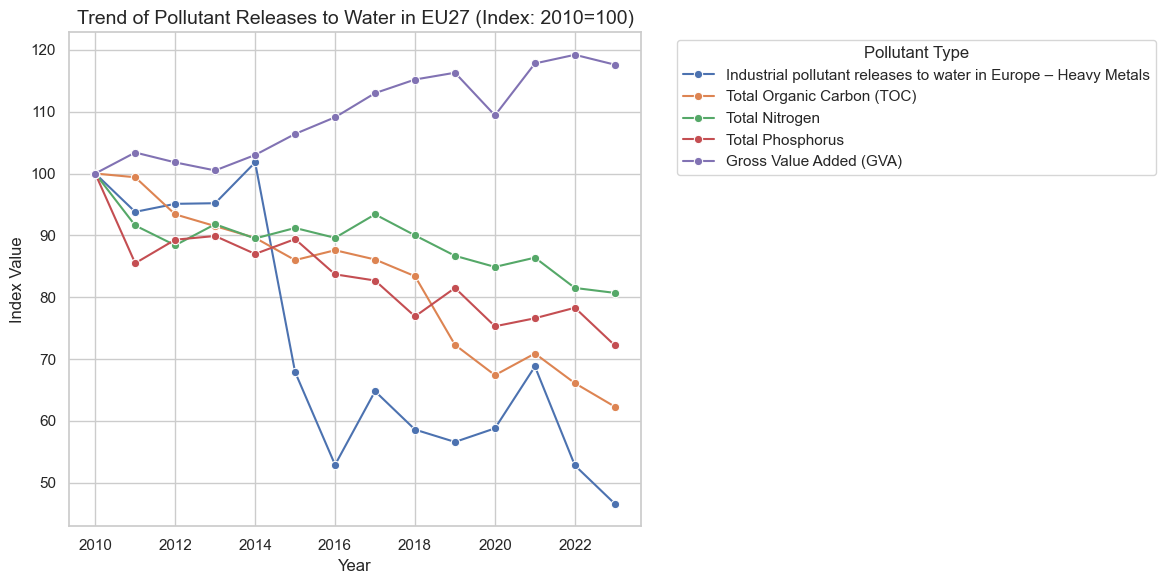

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="time", y="obs_value", hue="dimension_label", marker="o")
plt.title("Trend of Pollutant Releases to Water in EU27 (Index: 2010=100)")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.legend(title="Pollutant Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save before showing
plt.savefig("Line Chart – Pollutant Trends Over Time.png", dpi=300, bbox_inches='tight')
plt.show()


# 📊 2. Bar Chart – Compare Pollutants in 2023

C:\Users\amali\AppData\Local\Temp\ipykernel_13052\1080787556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2023, x="obs_value", y="dimension_label", palette="viridis")


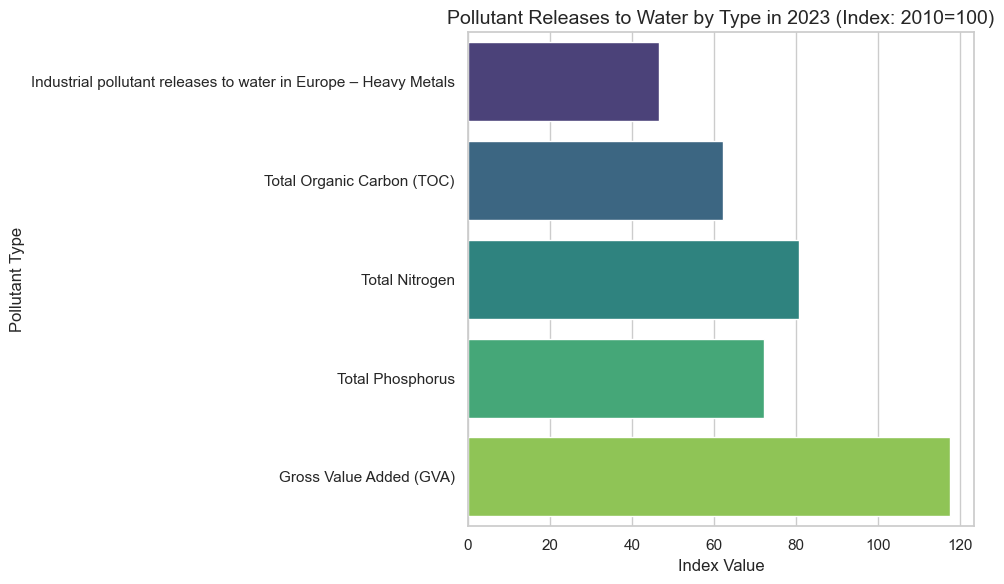

In [9]:
df_2023 = df[df["time"] == 2023]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_2023, x="obs_value", y="dimension_label", palette="viridis")
plt.title("Pollutant Releases to Water by Type in 2023 (Index: 2010=100)")
plt.xlabel("Index Value")
plt.ylabel("Pollutant Type")
plt.tight_layout()

# Save before showing
plt.savefig("Bar Chart – Compare Pollutants in 2023.png", dpi=300, bbox_inches='tight')
plt.show()


# 🔥 3. Heatmap – Year vs Pollutant

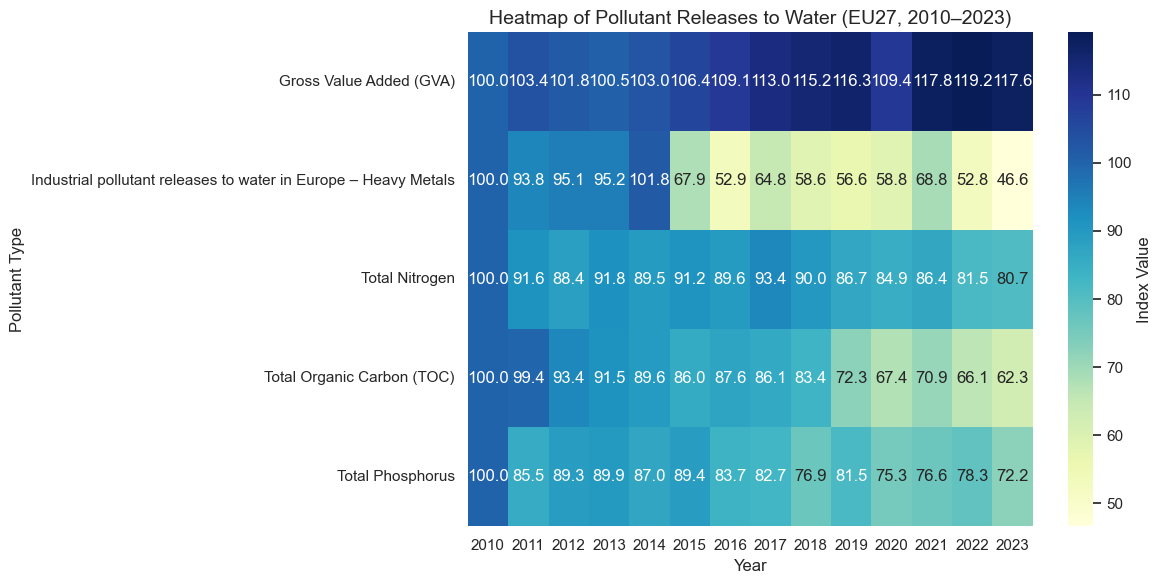

In [10]:
# Pivot using keyword arguments
heatmap_data = df.pivot(index="dimension_label", columns="time", values="obs_value")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Index Value'})
plt.title("Heatmap of Pollutant Releases to Water (EU27, 2010–2023)")
plt.xlabel("Year")
plt.ylabel("Pollutant Type")
plt.tight_layout()

# Save before showing
plt.savefig("Heatmap – Year vs Pollutant.png", dpi=300, bbox_inches='tight')
plt.show()


# 🌊 4. Area Chart – Stacked Area

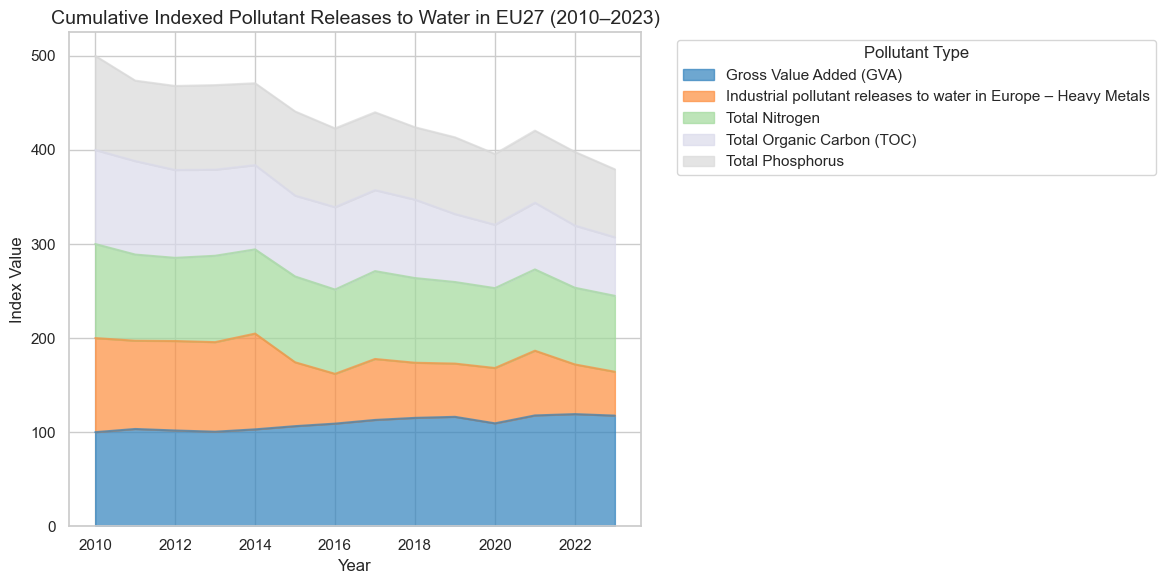

In [11]:
pivot_area = df.pivot(index="time", columns="dimension_label", values="obs_value")

pivot_area.plot(kind='area', stacked=True, figsize=(12, 6), cmap="tab20c", alpha=0.7)
plt.title("Cumulative Indexed Pollutant Releases to Water in EU27 (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.legend(title="Pollutant Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save before showing
plt.savefig("Area Chart – Stacked Area.png", dpi=300, bbox_inches='tight')
plt.show()


# 📉 5. Slope Chart – First vs Last Year

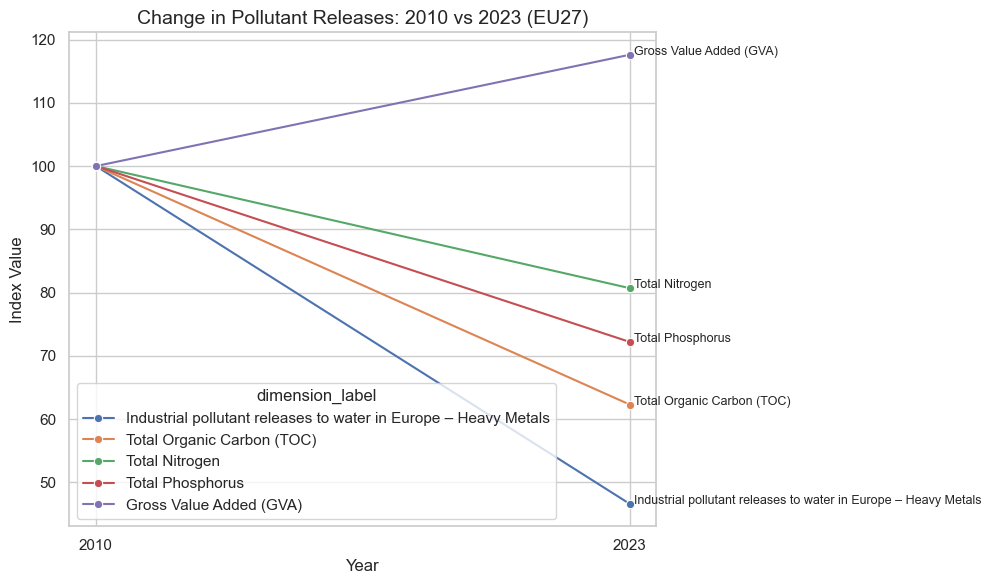

In [12]:
df_slope = df[df["time"].isin([2010, 2023])]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_slope, x="time", y="obs_value", hue="dimension_label", marker="o")

# Add labels
for pollutant in df_slope["dimension_label"].unique():
    df_p = df_slope[df_slope["dimension_label"] == pollutant]
    end_val = df_p[df_p["time"] == 2023]["obs_value"].values[0]
    plt.text(2023.1, end_val, pollutant, fontsize=9)

plt.title("Change in Pollutant Releases: 2010 vs 2023 (EU27)")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.xticks([2010, 2023])
plt.tight_layout()

# Save before showing
plt.savefig("Slope Chart – First vs Last Year.png", dpi=300, bbox_inches='tight')
plt.show()


# ✅ Save Processed Files

In [13]:
# Save the original dataset with cleaned pollutant labels
df.to_csv("pollution_data_cleaned.csv", index=False)


In [14]:
# Save 2023 Data for Bar Chart
df_2023 = df[df["time"] == 2023]
df_2023.to_csv("pollution_data_2023.csv", index=False)


In [15]:
# Save 2010 vs 2023 for Slope Chart
df_slope = df[df["time"].isin([2010, 2023])]
df_slope.to_csv("pollution_data_2010_vs_2023.csv", index=False)
